# Import libraries


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization

# Load the Telco Churn dataset from the UCI Machine Learning Repository


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (3).csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1831,3402-XRIUO,Female,1,Yes,No,22,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,63.55,1381.8,No
4792,7067-KSAZT,Female,1,Yes,No,65,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.25,6979.8,Yes
599,0374-FIUCA,Male,0,Yes,No,65,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.40,1414.45,No
2707,7938-OUHIO,Male,0,No,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.70,293.65,Yes
4393,2057-ZBLPD,Female,0,Yes,No,21,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.50,1808.7,Yes
1472,9283-LZQOH,Male,0,Yes,Yes,13,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.40,896.75,Yes
2155,0524-IAVZO,Female,0,Yes,No,30,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,2624.25,Yes
2379,3757-NJYBX,Male,1,Yes,No,32,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),106.35,3520.75,Yes
853,7905-TVXTA,Female,0,No,No,5,Yes,No,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,64.35,352.65,No
6006,1360-RCYRT,Male,0,Yes,Yes,23,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),30.35,678.75,No


# Droping the extra column

In [3]:
df.drop('customerID',axis='columns',inplace=True)

# Finding the type of the data(object or float or integer etc.)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Values of a certain attribute

In [5]:
df.TotalCharges.values

# converting an attribute to numeric value and ignoring the errors comming due to spaces
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

#shape of the missing data and the data set
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape
df.shape

#dropping the rows of the missing variables and forming a new data set
df1 = df[df.TotalCharges!=' ']
df1.shape
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Forming the new data frame

In [7]:
import seaborn as sns
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes
df1.sample(5)
df1.dtypes
#categorical data identification
def print_unique_col_values(df):    
    for col in df:
        if df[col].dtype=='object':
            print(f'{col}:{df[col].unique()}')
#replacing same variables in same name
print_unique_col_values(df1)
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank tra

C:\Users\SURJAKANTA\AppData\Local\Temp\ipykernel_6936\1643290214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
C:\Users\SURJAKANTA\AppData\Local\Temp\ipykernel_6936\1643290214.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\SURJAKANTA\AppData\Local\Temp\ipykernel_6936\1643290214.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [18]:
import seaborn as sns


# Print the available color palettes
available_palettes = sns.palettes.SEABORN_PALETTES
print(available_palettes)


AttributeError: module 'seaborn' has no attribute 'palettes'

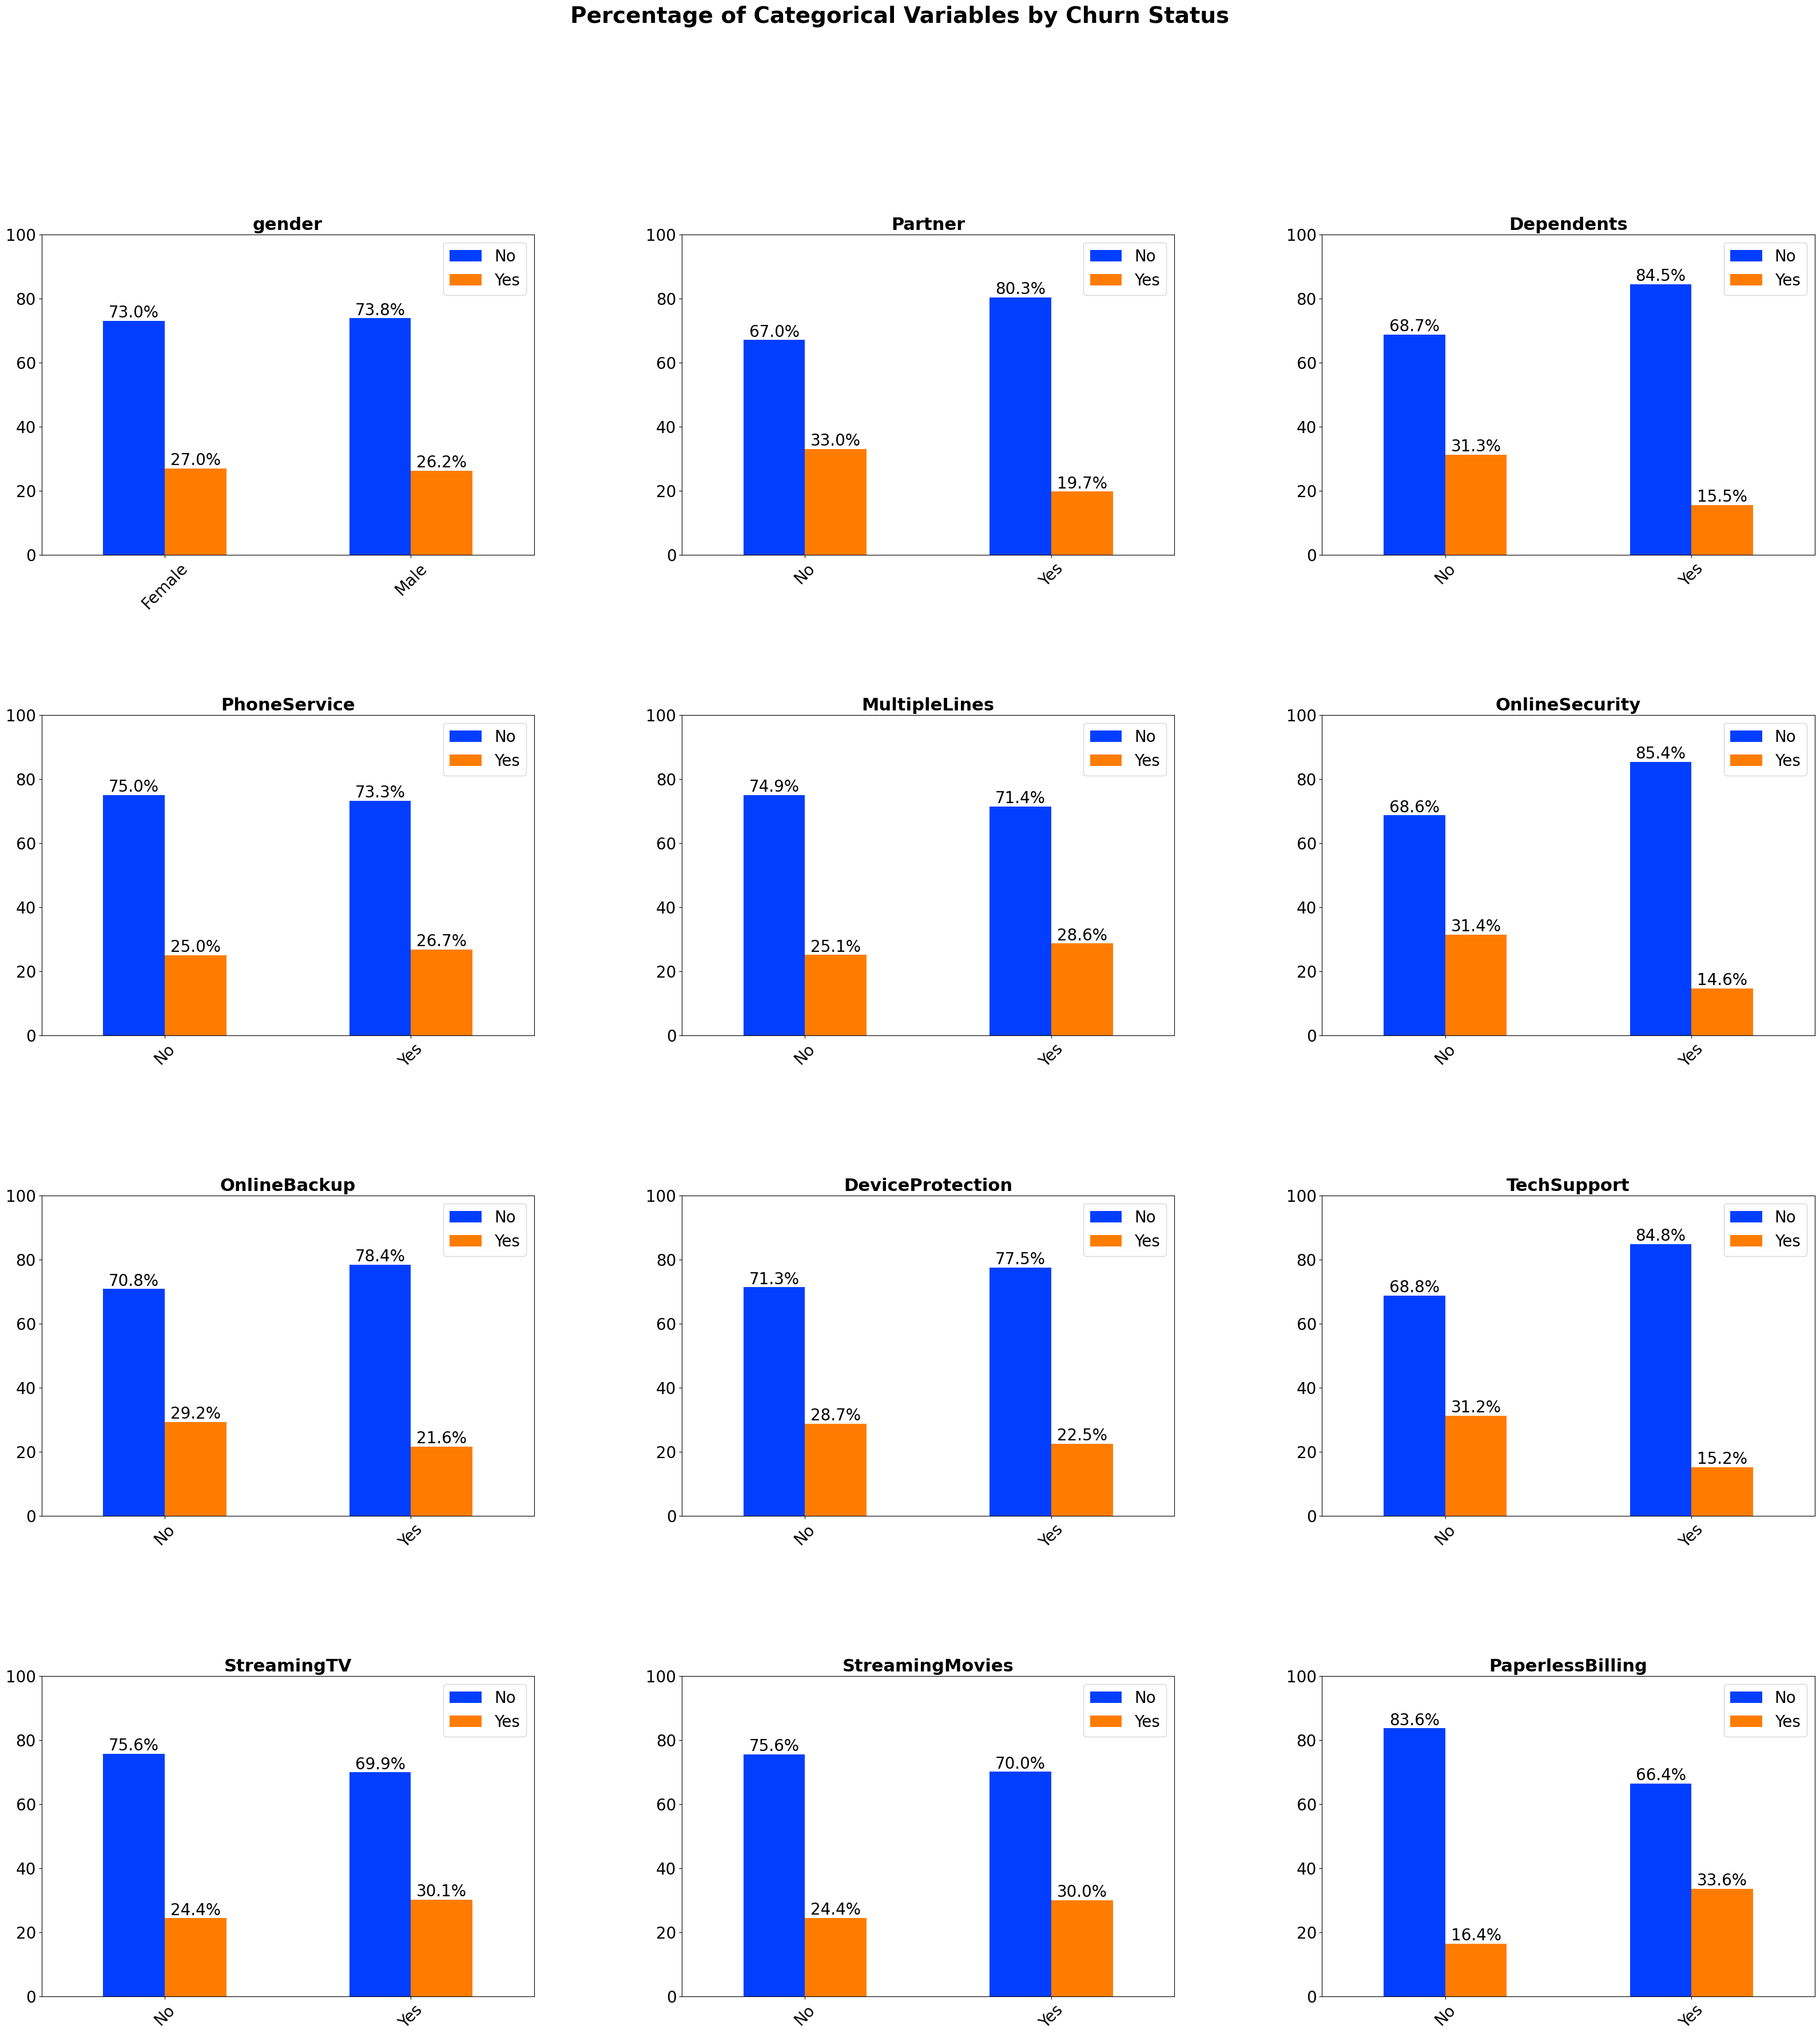

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categorical variables to plot
cat_cols = ['gender', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'PaperlessBilling']

# Set the color palette
colors = sns.color_palette('bright')

# Create a matrix of subplots with 4 rows and 3 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(40, 40))

# Loop over the categorical variables and create a dodge bar plot for each
for i, col in enumerate(cat_cols):
    
    # Calculate the counts for each category by Churn status
    counts = df1.groupby([col, 'Churn']).size().reset_index(name='Count')
    
    # Pivot the counts data to create the dodge bar plot
    counts_pivot = counts.pivot(index=col, columns='Churn', values='Count')
    
    # Convert the counts to percentages
    counts_pivot = counts_pivot.div(counts_pivot.sum(axis=1), axis=0) * 100
    
    # Create the dodge bar plot
    counts_pivot.plot(kind='bar', stacked=False, color=colors, ax=axes[i//3][i%3])
    
    # Add the percentage values on top of each bar
    for patch in axes[i//3][i%3].patches:
        height = patch.get_height()
        x = patch.get_x()
        y = patch.get_y()
        axes[i//3][i%3].text(x + patch.get_width()/2, y + height, f'{height:.1f}%', ha='center', va='bottom', fontsize=20)
        
    # Add plot title and axis labels
    axes[i//3][i%3].set_title(col, fontsize=22, fontweight='bold')
    axes[i//3][i%3].set_xlabel(None)
    axes[i//3][i%3].set_ylabel(None)
    axes[i//3][i%3].set_ylim([0, 100])
    axes[i//3][i%3].legend(fontsize=20)
    axes[i//3][i%3].set_xticklabels(axes[i//3][i%3].get_xticklabels(), rotation=45, fontsize=20)
    axes[i//3][i%3].tick_params(axis='y',labelsize=20)
                                    
# Add the main title and adjust the spacing between subplots
plt.suptitle('Percentage of Categorical Variables by Churn Status', fontsize=28, fontweight='bold')
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


# Nominal data transformation

In [26]:
binary_col=['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies','PaperlessBilling', 'Churn']
for col in binary_col:
    df1[col].replace({'Yes': 1,'No': 0}, inplace = True)
#df1.replace({'Yes': 1,'No': 0}, inplace = True)
print_unique_col_values(df1)
for col in df1:
    print(f'{col}:{df1[col].unique()}')
    
#df1['gender'].replace({'Female': 1,'Male': 0}, inplace = True)
#for col in df1:
   # print(f'{col}:{df1[col].unique()}')
    
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod','gender'])
df2.columns    
df2.sample(4)
df2.dtypes

C:\Users\SURJAKANTA\AppData\Local\Temp\ipykernel_6936\567255874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0}, inplace = True)


gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.1

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
Contract_Month-to-month        

# List the all column having catagorical value

In [27]:
cat=[i  for i  in df.columns if len(df1[i].unique())< 4]
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'Churn']

# Plot of the variables according to Churn

# Correlation plot

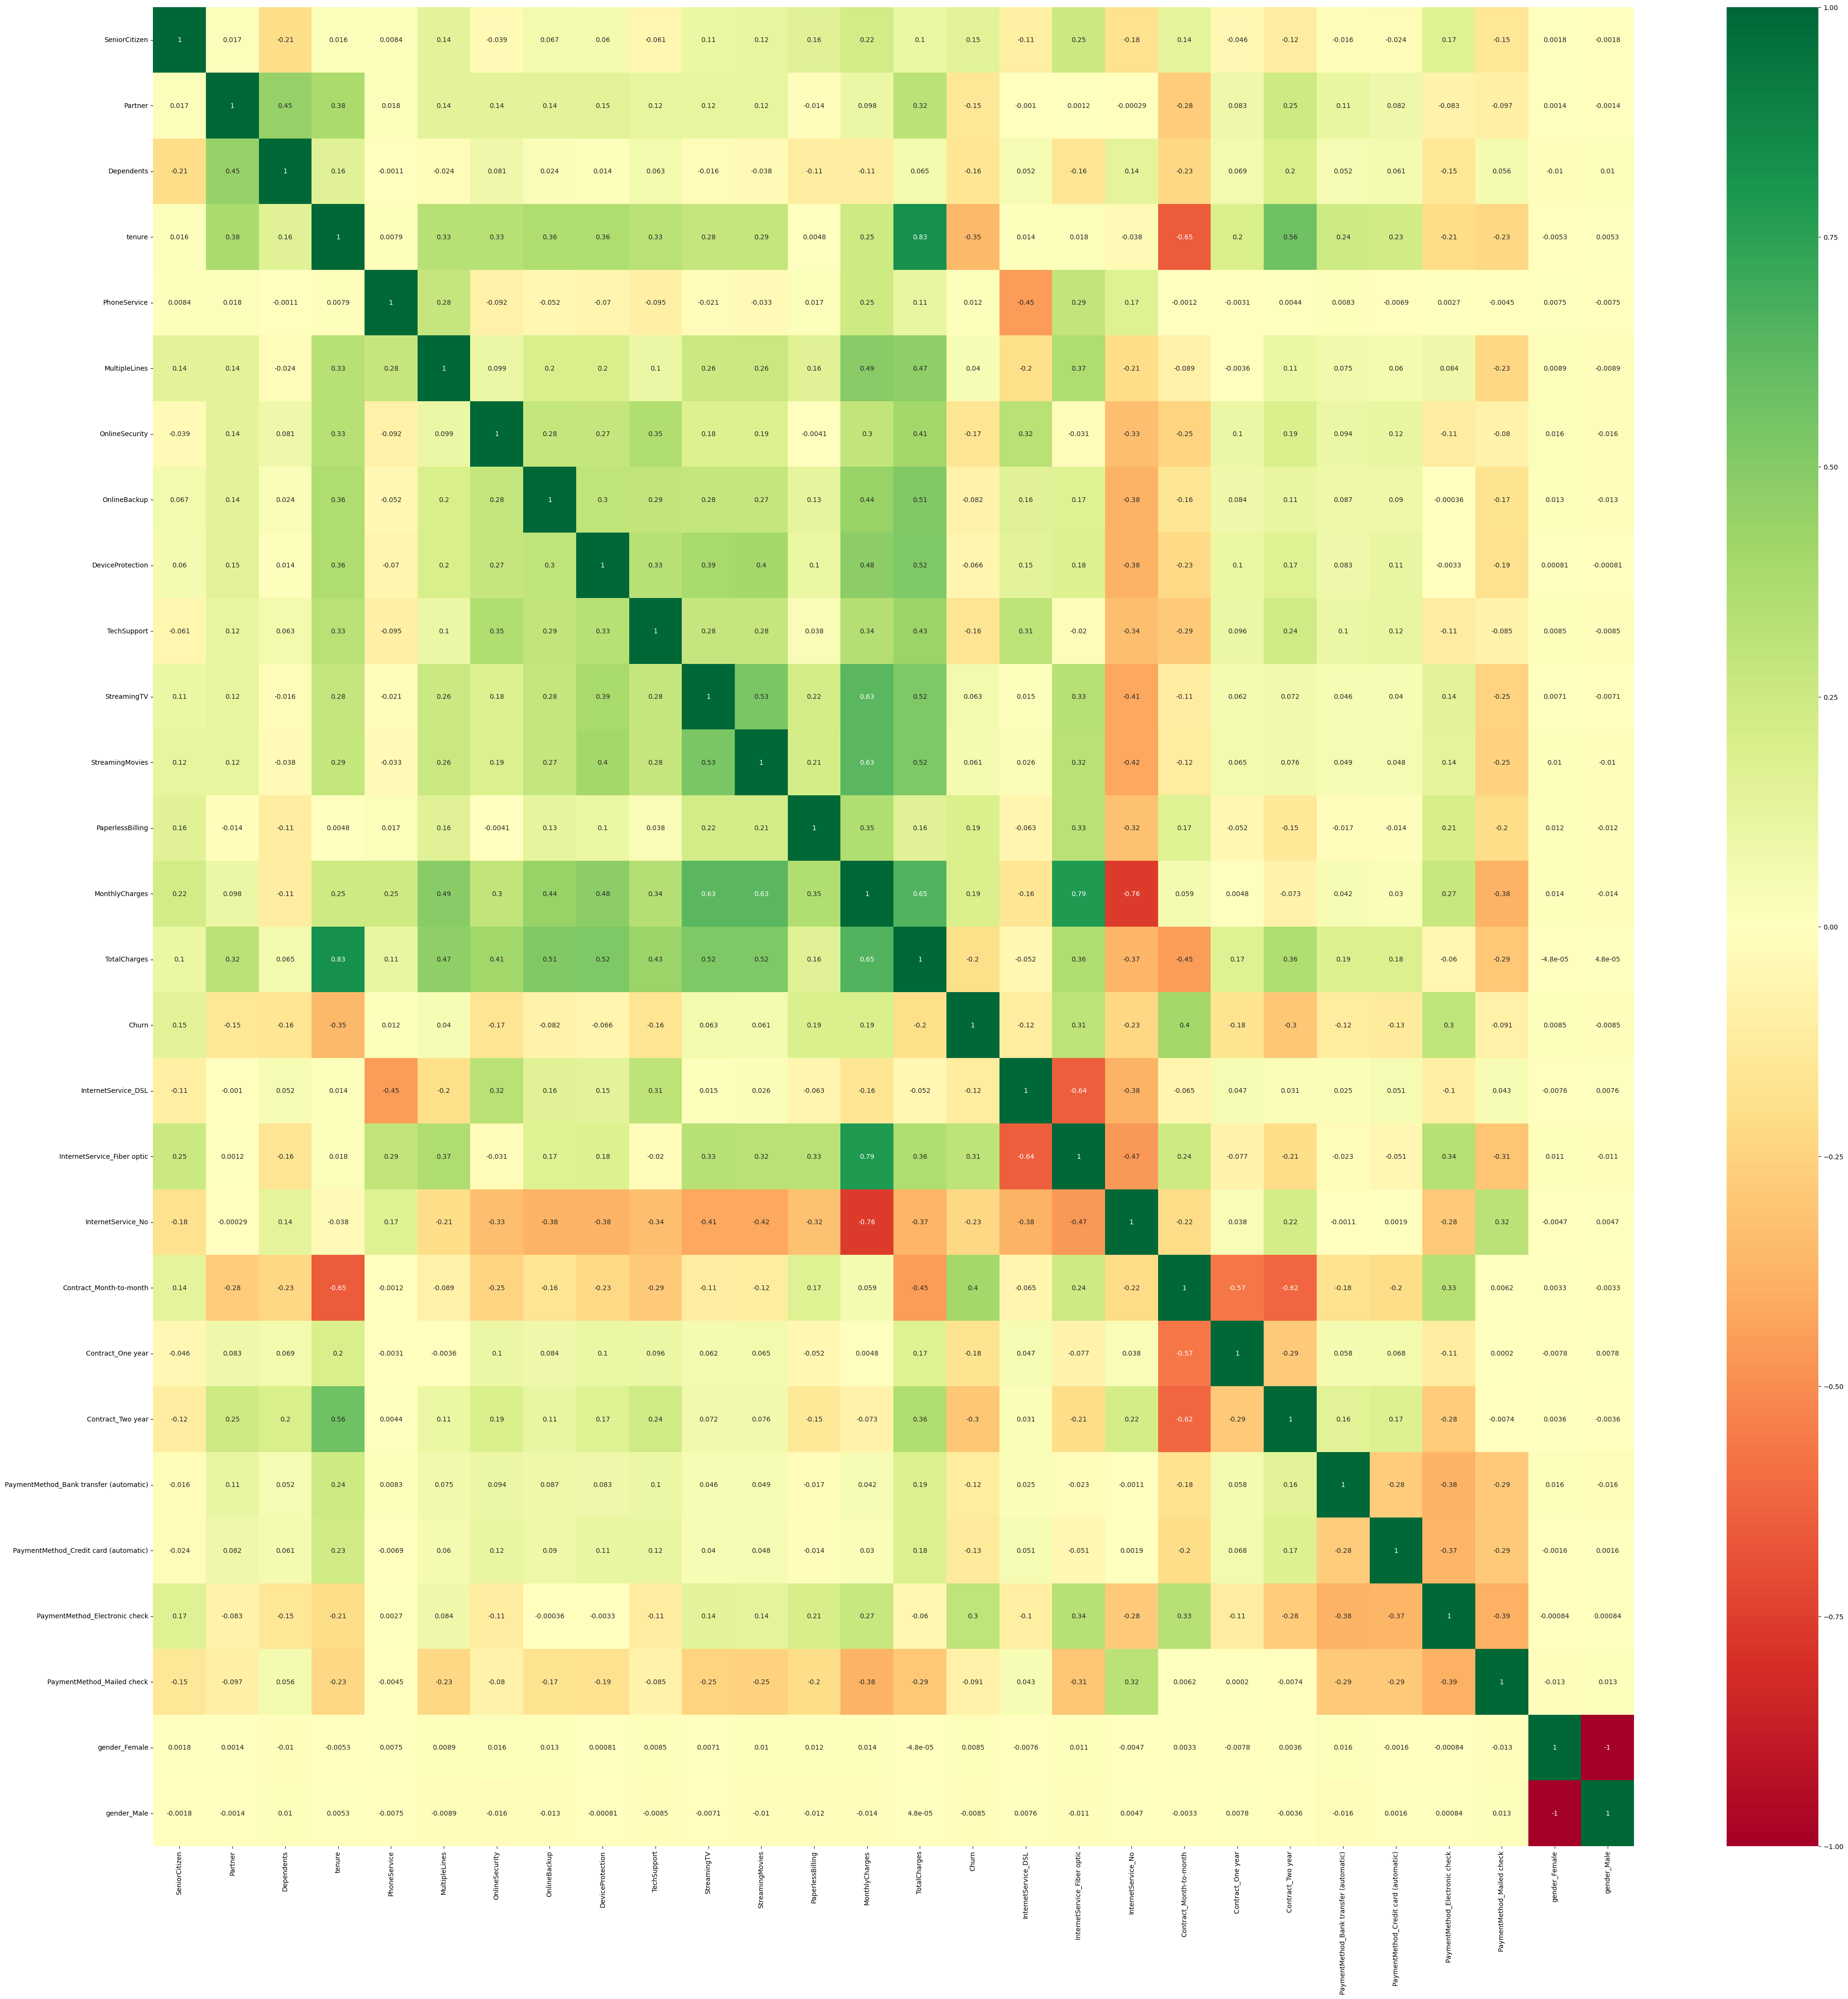

In [28]:
cor=df2.corr()
feature=cor.index
plt.figure(figsize=(50,50))
g=sns.heatmap(df2[feature].corr(),annot=True,cmap="RdYlGn")

TypeError: 'Axes' object is not subscriptable

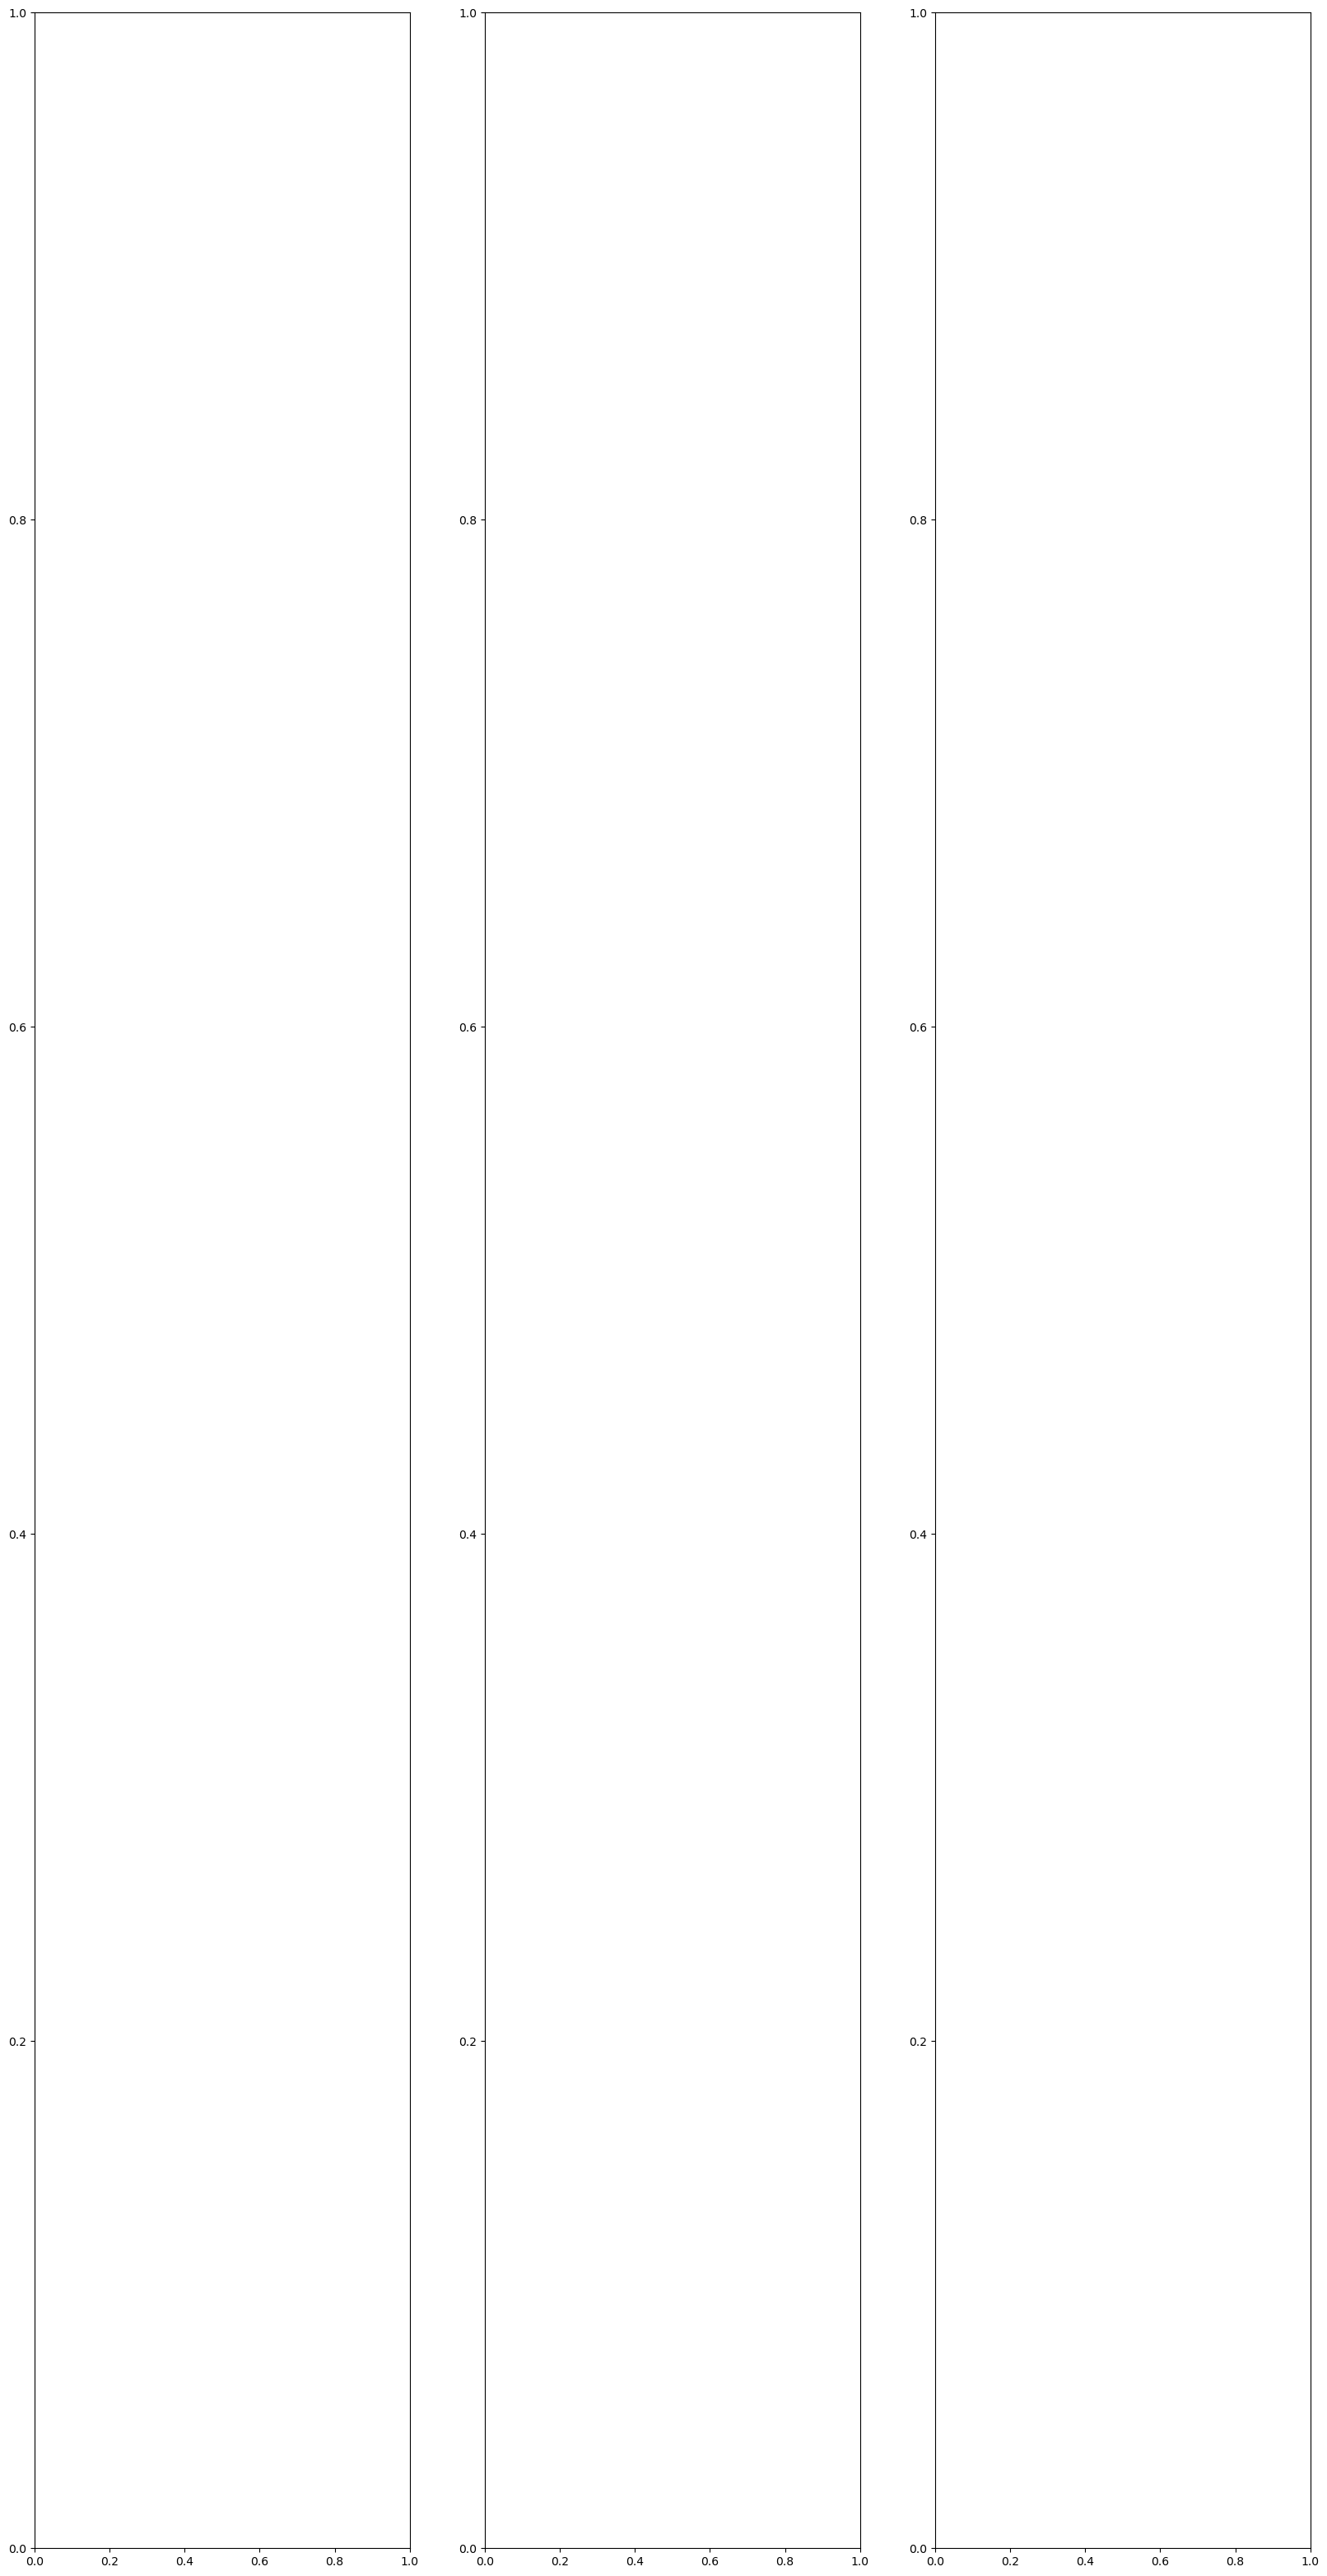

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categorical variables to plot
cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
# Set the color palette
colors = sns.color_palette('deep6')
# Create a matrix of subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))

# Loop over the categorical variables and create a dodge bar plot for each
for i, col in enumerate(cat_cols):
    
    # Calculate the counts for each category by Churn status
    counts = df.groupby([col, 'Churn']).size().reset_index(name='Count')
    
    # Pivot the counts data to create the dodge bar plot
    counts_pivot = counts.pivot(index=col, columns='Churn', values='Count')
    
    # Convert the counts to percentages
    counts_pivot = counts_pivot.div(counts_pivot.sum(axis=1), axis=0) * 100
    
    # Create the dodge bar plot
    counts_pivot.plot(kind='bar', stacked=False, ax=axes[i//2import seaborn as sns import matplotlib.pyplot as plt # Define the categorical variables to plot cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'] # Set the color palette colors = sns.color_palette('deep6') # Create a matrix of subplots with the specified number of rows and columns fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 40)) # Loop over the categorical variables and create a dodge bar plot for each for i, col in enumerate(cat_cols): # Calculate the counts for each category by Churn status counts = df.groupby([col, 'Churn']).size().reset_index(name='Count') # Pivot the counts data to create the dodge bar plot counts_pivot = counts.pivot(index=col, columns='Churn', values='Count') # Convert the counts to percentages counts_pivot = counts_pivot.div(counts_pivot.sum(axis=1), axi][i%2])
    
    # Add the percentage values on top of each bar
    for patch in axes[i//3][i%3].patches:
        width = patch.get_width()
        height = patch.get_height()
        x = patch.get_x()
        y = patch.get_y()
        axes[i//3][i%3].text(x + width/2, y + height + 2, f'{height:.1f}%', ha='center', fontsize=16)
        
    # Add plot title and axis labels
    axes[i//3][i%3].set_title(col, fontsize=20, fontweight='bold')
    axes[i//3][i%3].set_xlabel(None)
    axes[i//3][i%3].set_ylabel(None)
    axes[i//3][i%3].set_ylim([0, 100])
    axes[i//3][i%3].legend()
    axes[i//3][i%3].set_xticklabels(axes[i//3][i%3].get_xticklabels(), rotation=45, fontsize=16)
    axes[i//3][i%3].tick_params(axis='y', labelsize=16) 
# Add the main title and adjust the spacing between subplots
plt.suptitle('Percentage of Categorical Variables by Churn Status', fontsize=25, fontweight='bold')
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


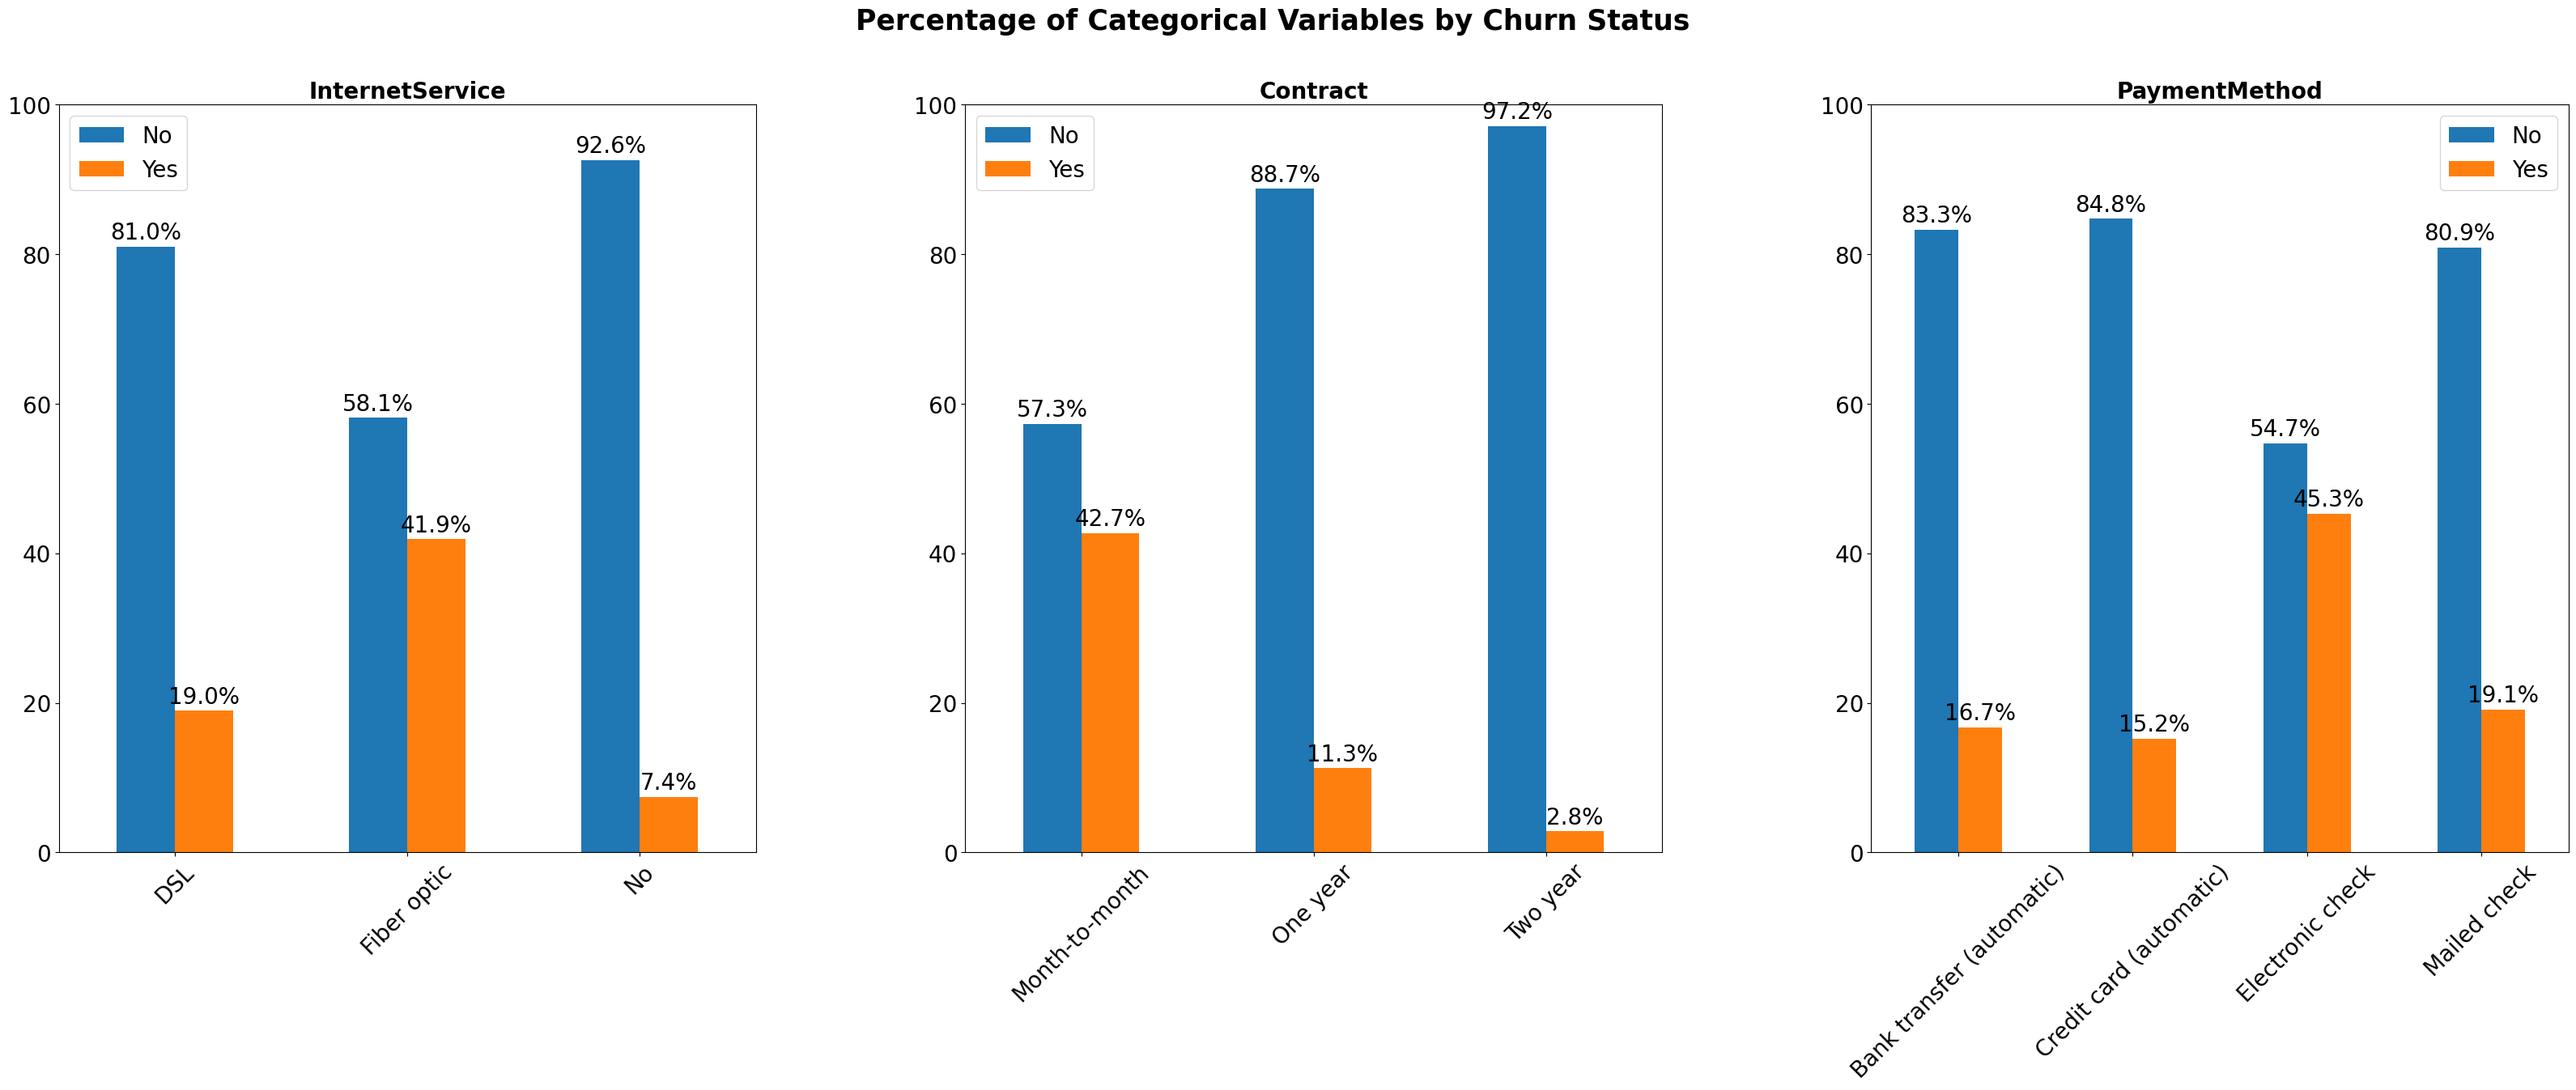

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categorical variables to plot
cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
# Set the color palette
colors = sns.color_palette('deep6')
# Create a matrix of subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40, 12))

# Flatten the axes array
axes = axes.flatten()

# Loop over the categorical variables and create a dodge bar plot for each
for i, col in enumerate(cat_cols):
   
    # Calculate the counts for each category by Churn status
    counts = df.groupby([col, 'Churn']).size().reset_index(name='Count')
   
    # Pivot the counts data to create the dodge bar plot
    counts_pivot = counts.pivot(index=col, columns='Churn', values='Count')
   
    # Convert the counts to percentages
    counts_pivot = counts_pivot.div(counts_pivot.sum(axis=1), axis=0) * 100
   
    # Create the dodge bar plot
    counts_pivot.plot(kind='bar', stacked=False, ax=axes[i])
   
    # Add the percentage values on top of each bar
    for patch in axes[i].patches:
        width = patch.get_width()
        height = patch.get_height()
        x = patch.get_x()
        y = patch.get_y()
        axes[i].text(x + width/2, y + height + 1, f'{height:.1f}%', ha='center', fontsize=20)
       
    # Add plot title and axis labels
    axes[i].set_title(col, fontsize=20, fontweight='bold')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_ylim([0, 100])
    axes[i].legend(fontsize=20)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, fontsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
    
# Add the main title and adjust the spacing between subplots
plt.suptitle('Percentage of Categorical Variables by Churn Status', fontsize=25, fontweight='bold')
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

In [ ]:
#pip install researchpy

In [ ]:
#pip install scipy

In [ ]:
import pandas as pd
import researchpy as rp
from scipy import stats

# Calculate the Cramer's V correlation for all variables with "Churn"
correlation_matrix = pd.DataFrame(index=df2.columns, columns=['Cramer\'s V'])
for column in df2.columns:
    cross_table, _ = pd.crosstab(df2[column], df2['Churn']), pd.crosstab(df2[column], df2['Churn']).values
    chi2 = stats.chi2_contingency(cross_table)[0]
    n = cross_table.sum().sum()
    phi2 = chi2 / n
    cramers_v = np.sqrt(phi2 / (min(cross_table.shape) - 1))
    correlation_matrix.loc[column, 'Cramer\'s V'] = cramers_v
# Sort the correlation matrix in ascending order
sorted_matrix = correlation_matrix.sort_values(by='Cramer\'s V',ascending=False)

# Print the correlation matrix
print(sorted_matrix)


[0.02094703 0.02255302 0.01936567 0.15800573 0.0062665  0.01927265
 0.02190472 0.02074918 0.01792933 0.01970923 0.01760998 0.01757365
 0.02587266 0.16919861 0.18061953 0.00911761 0.04114886 0.01393363
 0.06873464 0.01057157 0.02214507 0.01160065 0.01272268 0.02656747
 0.01195937 0.01636277 0.01755819]
Feature ranking:
Feature ranking:
1. feature 14 (0.180620)
2. feature 13 (0.169199)
3. feature 3 (0.158006)
4. feature 18 (0.068735)
5. feature 16 (0.041149)
6. feature 23 (0.026567)
7. feature 12 (0.025873)
8. feature 1 (0.022553)
9. feature 20 (0.022145)
10. feature 6 (0.021905)
11. feature 0 (0.020947)
12. feature 7 (0.020749)
13. feature 9 (0.019709)
14. feature 2 (0.019366)
15. feature 5 (0.019273)
16. feature 8 (0.017929)
17. feature 10 (0.017610)
18. feature 11 (0.017574)
19. feature 26 (0.017558)
20. feature 25 (0.016363)
21. feature 17 (0.013934)
22. feature 22 (0.012723)
23. feature 24 (0.011959)
24. feature 21 (0.011601)
25. feature 19 (0.010572)
26. feature 15 (0.009118)
27. f

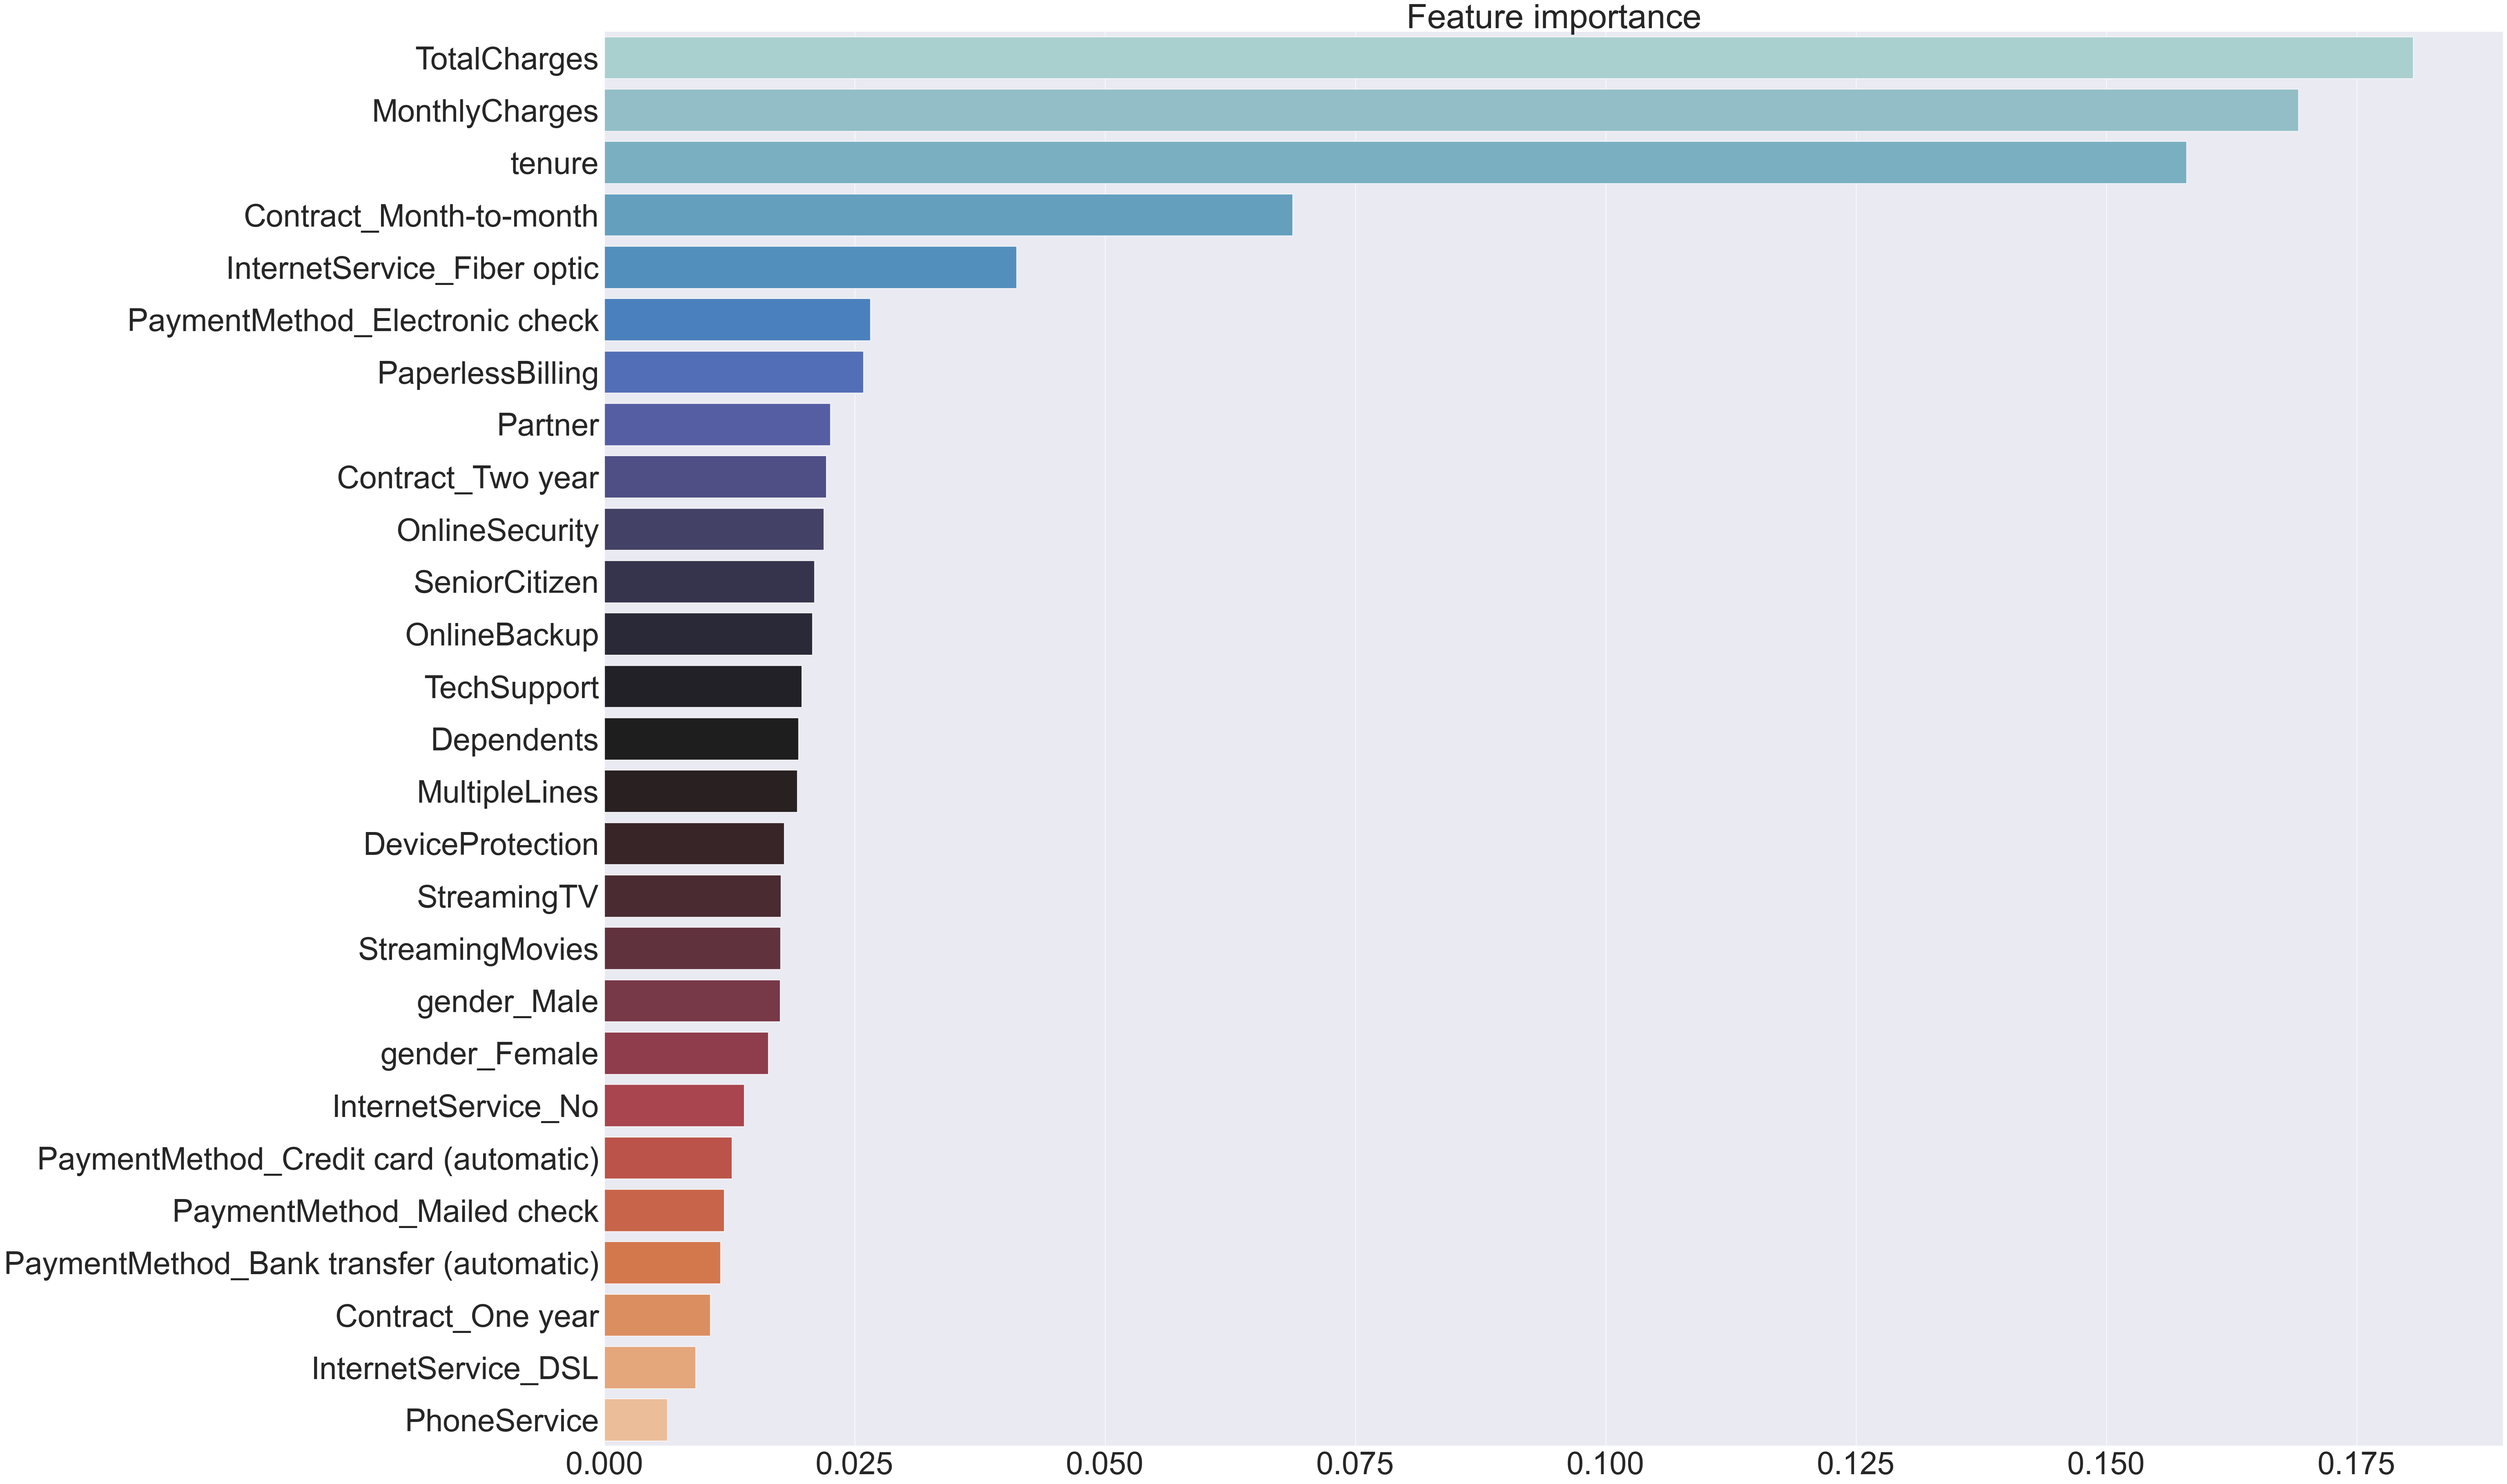

In [44]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
Rf= RandomForestClassifier(criterion='gini')
Rf= Rf.fit(x_train,y_train)
y_pred_rf=Rf.predict(x_test)
print(Rf.feature_importances_)
print("Feature ranking:")
importances = Rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot features importances
imp = pd.Series(data=Rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(60,45))
plt.title("Feature importance")
sns.set(font_scale=5)
ax = sns.barplot(y=imp.index, x=imp.values, palette="icefire", orient='h')


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

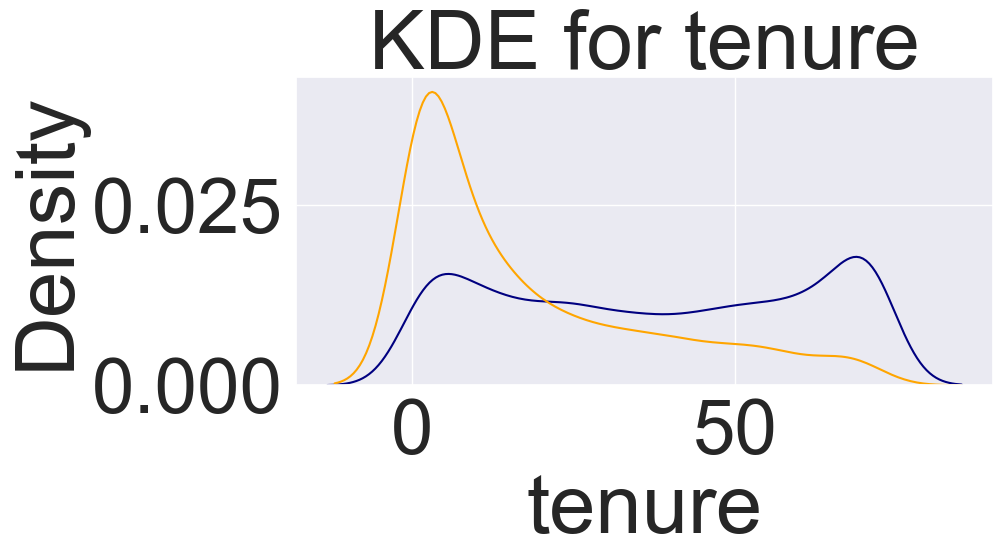

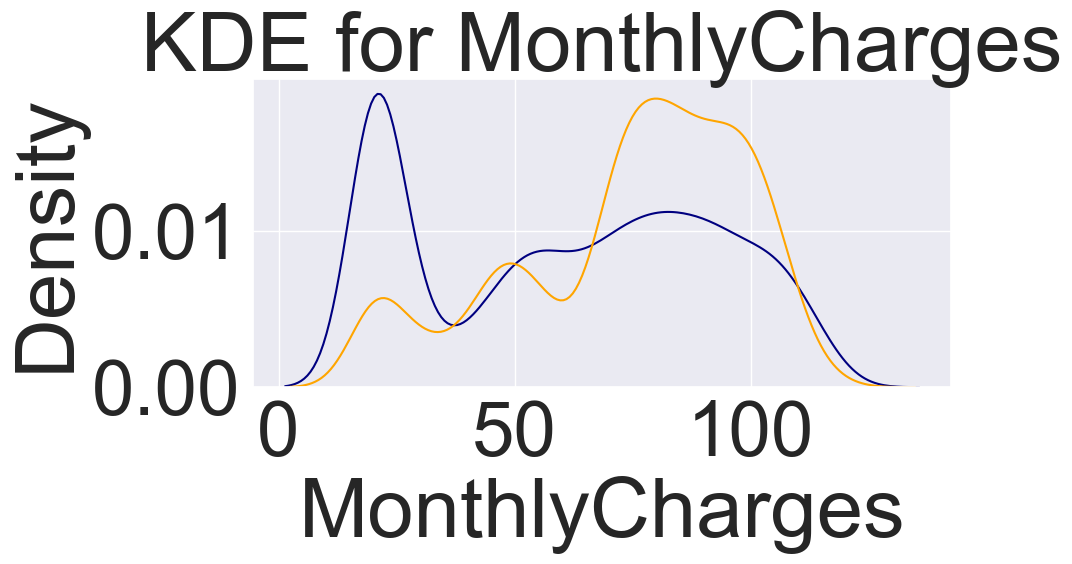

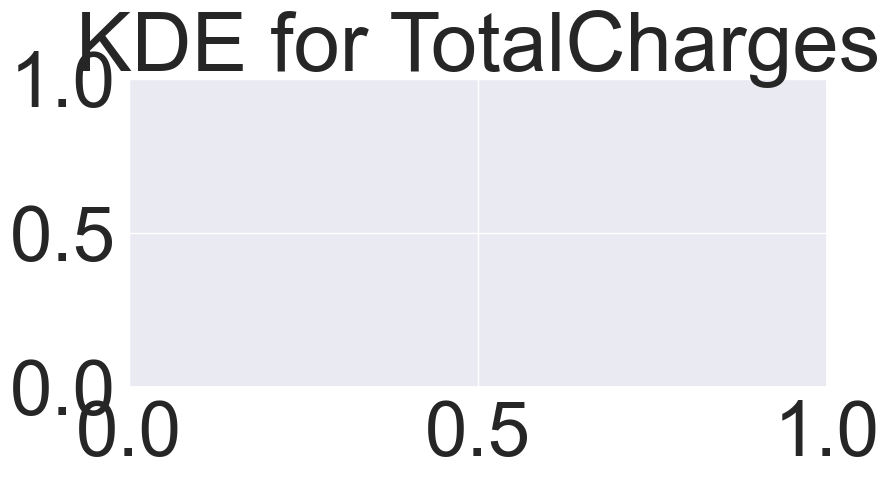

In [43]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')